In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.metrics import classification_report, confusion_matrix, matthews_corrcoef
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import ElasticNet

## 📥 Load the Dataset

In [10]:
data = pd.read_csv("data/ObesityDataSet_raw_and_data_sinthetic.csv")

# Initial inspection
display(data.head())
print("Shape:", data.shape)
print("Columns:", data.columns)
print("Missing values:\n", data.isnull().sum())
data.info()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


Shape: (2111, 17)
Columns: Index(['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight',
       'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE',
       'CALC', 'MTRANS', 'NObeyesdad'],
      dtype='object')
Missing values:
 Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Col

## 📊 Visualizing Missing Data

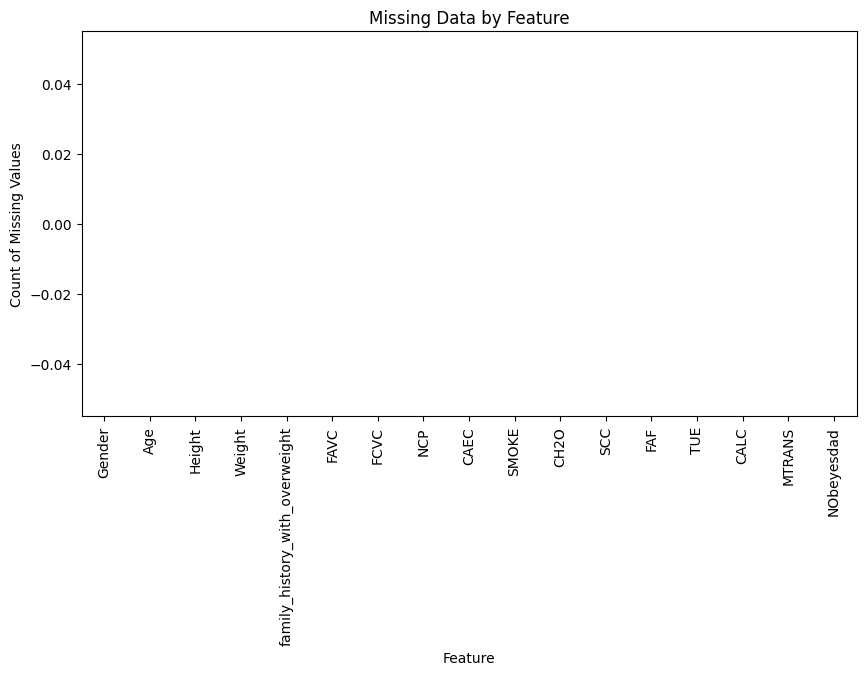

In [11]:
data.isnull().sum().plot(kind='bar', figsize=(10, 5), color='skyblue')
plt.title("Missing Data by Feature")
plt.ylabel("Count of Missing Values")
plt.xlabel("Feature")
plt.show()

## 🧹 Data Cleaning & Feature Engineering

In [12]:
data['Gender'] = data['Gender'].map({'Male': 1, 'Female': 0})  
data = pd.get_dummies(data, columns=['family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'MTRANS'], drop_first=True)
data = data.drop('NObeyesdad', axis=1)
data['BMI'] = data['Weight'] / (data['Height'] ** 2)  
data['overweight'] = (data['BMI'] >= 25).astype(int)

print("Final Shape: ", data.shape)
print("Final Columns: ", data.columns, "\n")
print("Final Missing Values per Column:\n", data.isnull().sum(), "\n")

Final Shape:  (2111, 23)
Final Columns:  Index(['Gender', 'Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF',
       'TUE', 'CALC', 'family_history_with_overweight_yes', 'FAVC_yes',
       'CAEC_Frequently', 'CAEC_Sometimes', 'CAEC_no', 'SMOKE_yes', 'SCC_yes',
       'MTRANS_Bike', 'MTRANS_Motorbike', 'MTRANS_Public_Transportation',
       'MTRANS_Walking', 'BMI', 'overweight'],
      dtype='object') 

Final Missing Values per Column:
 Gender                                0
Age                                   0
Height                                0
Weight                                0
FCVC                                  0
NCP                                   0
CH2O                                  0
FAF                                   0
TUE                                   0
CALC                                  0
family_history_with_overweight_yes    0
FAVC_yes                              0
CAEC_Frequently                       0
CAEC_Sometimes                     

## 🔍 Correlation Heatmap

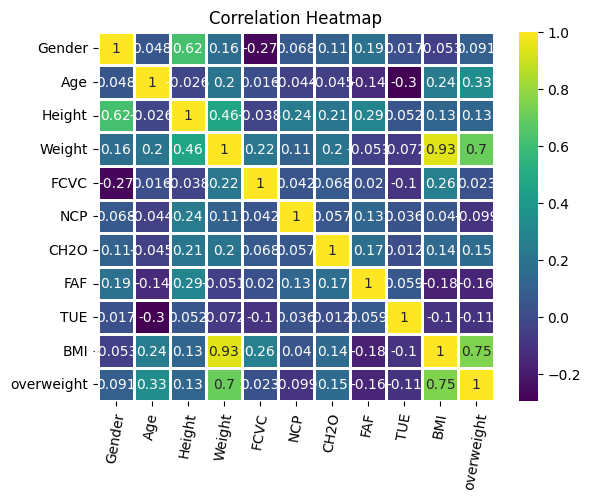

In [13]:
plt.figure(dpi=100)
sns.heatmap(data.select_dtypes(include=[np.number]).corr(), annot=True, cmap="viridis", linewidths=1, linecolor='white')
plt.title("Correlation Heatmap")
plt.xticks(rotation=80)
plt.show()

## 📈 Simple Linear Regression

Linear regression R^2:  0.8738617861201203
Linear regression Intercept:  4.94194012240979
Linear regression Coef:  [0.2859377]
Linear regression MAE:  2.294638012690543
Linear regression MSE:  8.091906553543568
Linear regression RMSE:  2.844627665186354


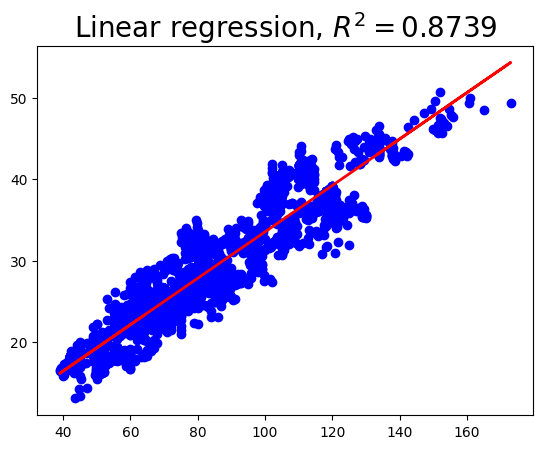

In [14]:
X = data['Weight'].values.reshape(-1, 1)
y = data['BMI']
model = LinearRegression().fit(X,y)
y_pred = model.predict(X)
r_sq = model.score(X,y)
print("Linear regression R^2: ", r_sq)
print("Linear regression Intercept: ", model.intercept_)
print("Linear regression Coef: ", model.coef_)
print("Linear regression MAE: ", metrics.mean_absolute_error(y, y_pred))
print("Linear regression MSE: ", metrics.mean_squared_error(y, y_pred))
print("Linear regression RMSE: ", np.sqrt(metrics.mean_squared_error(y, y_pred)))
plt.figure(dpi=100)
plt.scatter(X,y, color='blue')
plt.plot(X, y_pred, color='red', linewidth=2)
plt.title('Linear regression, $R^2 = %.4f$' % r_sq, fontsize=20)
plt.show()

## 📈 Simple Linear Regression with splitted dataset


Linear regression splitted dataset R^2 :  0.8831660090738952
Linear regression splitted dataset Intercept:  29.709743822139895
Linear regression splitted dataset Coef:  [7.35010294]
Linear regression splitted dataset MAE:  2.2787504235364406
Linear regression splitted dataset MSE:  8.039063369313324
Linear regression splitted dataset RMSE:  2.835324208853958


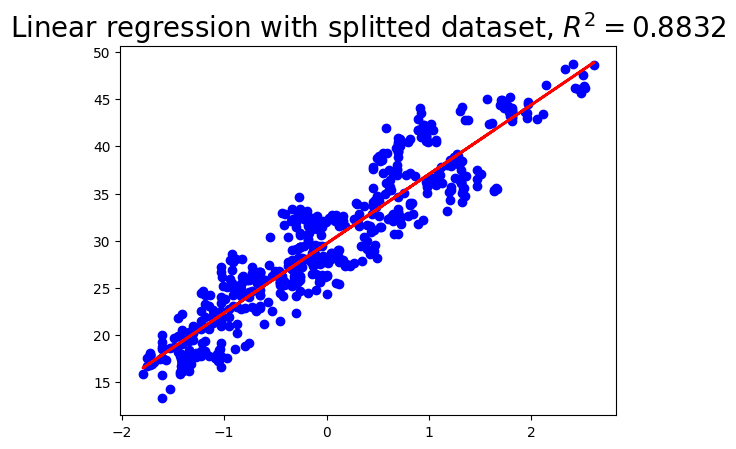

In [15]:
X = data['Weight'].values.reshape(-1, 1)
y = data['BMI']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 0)
stnd = StandardScaler()
X_train = stnd.fit_transform(X_train)
X_test = stnd.transform(X_test)
regressor = LinearRegression()
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
print("\nLinear regression splitted dataset R^2 : ", metrics.r2_score(y_test, y_pred))
print("Linear regression splitted dataset Intercept: ", regressor.intercept_)
print("Linear regression splitted dataset Coef: ", regressor.coef_)
print("Linear regression splitted dataset MAE: ", metrics.mean_absolute_error(y_test, y_pred))
print("Linear regression splitted dataset MSE: ", metrics.mean_squared_error(y_test, y_pred))
print("Linear regression splitted dataset RMSE: ", np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
plt.figure(dpi=100)
plt.scatter(X_test,y_test, color='blue')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.title('Linear regression with splitted dataset, $R^2 = %.4f$' % metrics.r2_score(y_test, y_pred), fontsize=20)
plt.show()

## 📈 Bivariate Linear Regression


Bivariate linear regression R^2 :  0.9893238194283539
Bivariate linear regression Intercept:  56.25663146262352
Bivariate linear regression Coefficients:  [  0.34025071 -32.91895514]
Bivariate linear regression MAE:  0.609231209071924
Bivariate linear regression MSE:  0.6848888443654886
Bivariate linear regression RMSE:  0.8275801135633266


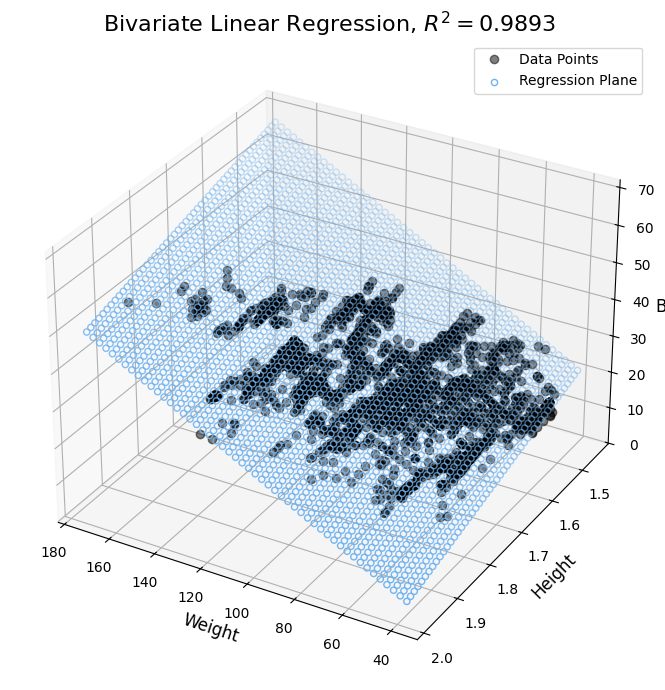

In [16]:
X = data[['Weight', 'Height']].values.reshape(-1, 2)
Y = data['BMI']
x = X[:, 0]
y = X[:, 1]
z = Y

x_p = np.linspace(x.min(), x.max(), 50)
y_p = np.linspace(y.min(), y.max(), 50)
xx_p, yy_p = np.meshgrid(x_p, y_p)

model_viz = np.array([xx_p.flatten(), yy_p.flatten()]).T

model = LinearRegression().fit(X, Y)
r_sq = model.score(X, Y)
predicted = model.predict(model_viz)

y_pred = model.predict(X)

print('\nBivariate linear regression R^2 : ', metrics.r2_score(Y, y_pred))
print("Bivariate linear regression Intercept: ", model.intercept_)
print("Bivariate linear regression Coefficients: ", model.coef_)
print("Bivariate linear regression MAE: ", metrics.mean_absolute_error(Y, y_pred))
print("Bivariate linear regression MSE: ", metrics.mean_squared_error(Y, y_pred))
print("Bivariate linear regression RMSE: ", np.sqrt(metrics.mean_squared_error(Y, y_pred)))

plt.style.use('default')
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

ax.plot(x, y, z, color='k', linestyle='none', marker='o', alpha=0.5, label='Data Points')
ax.scatter(xx_p.flatten(), yy_p.flatten(), predicted, facecolor=(0, 0, 0, 0), s=20, edgecolor='#70b3f0', label='Regression Plane')

ax.set_xlabel('Weight', fontsize=12)
ax.set_ylabel('Height', fontsize=12)
ax.set_zlabel('BMI', fontsize=12)
ax.set_title(f'Bivariate Linear Regression, $R^2 = {r_sq:.4f}$', fontsize=16)

ax.view_init(elev=30, azim=120)

plt.legend()
plt.tight_layout()
plt.show()

## 🤖 Polynomial Regression


Polynomial regression R^2:  0.8764677584488881
Polynomial regression Intercept:  0.9744236867286951
Polynomial regression Coefficients:  [ 0.          0.38249564 -0.00053686]
Polynomial regression MAE:  2.2989682632181982
Polynomial regression MSE:  7.924730533550209
Polynomial regression RMSE:  2.8150897913832535


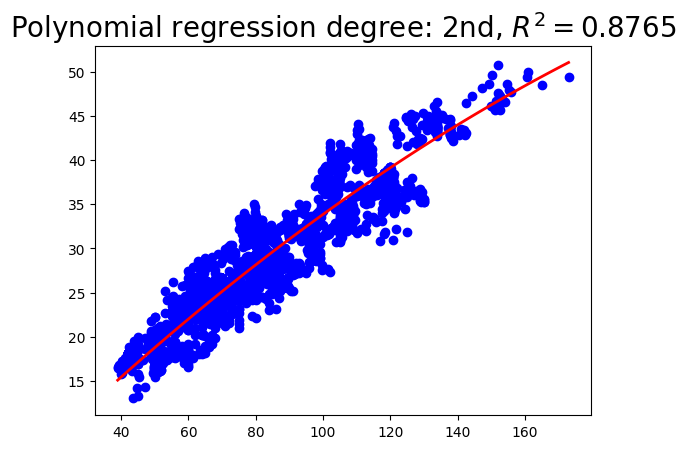

In [17]:
X = data['Weight'].values.reshape(-1, 1)
y = data['BMI']
reg_degree = 2

poly = PolynomialFeatures(degree=reg_degree, include_bias=True)
X_poly = poly.fit_transform(X)
reg = LinearRegression().fit(X_poly, y)
y_pred_poly = reg.predict(X_poly)
r_sq = reg.score(X_poly, y)
print("\nPolynomial regression R^2: ", r_sq)
print("Polynomial regression Intercept: ", reg.intercept_)
print("Polynomial regression Coefficients: ", reg.coef_)
print("Polynomial regression MAE: ", metrics.mean_absolute_error(y, y_pred_poly))
print("Polynomial regression MSE: ", metrics.mean_squared_error(y, y_pred_poly))
print("Polynomial regression RMSE: ", np.sqrt(metrics.mean_squared_error(y, y_pred_poly)))

x_grid = np.linspace(X.min(), X.max(), 100) .reshape(-1,1) 
x_grid_poly = poly.transform(x_grid)
y_grid_pred = reg.predict(x_grid_poly)

plt.figure(dpi=100)
plt.scatter(X,y, color='blue')
plt.plot(x_grid, y_grid_pred, color='red', linewidth=2)
plt.title(f'Polynomial regression degree: {reg_degree}nd, $R^2 = %.4f$' % r_sq, fontsize=20)
plt.show()

## 🤖 Bivariate Polynomial Regression


Bivariate polynomial regression R^2:  0.9999949595752572
Bivariate polynomial regression Intercept:  -0.13591248632428332
Bivariate polynomial regression Slope:  [ 7.05021491e-01 -2.01190942e-02  3.58312539e-02  3.77375443e-01
 -4.72181431e-02  8.66698718e-05 -7.20017535e-02 -8.53465400e-02
 -7.02224431e-02  8.69414803e-08 -1.10829829e-04  4.75225233e-02
 -4.25618603e-01 -5.31135600e-02 -1.29402429e-11 -4.22957305e-08
  3.38325467e-05 -1.02485802e-02  1.57837499e-01  9.80469889e-02]
Bivariate polynomial regression MAE:  0.012557316757102602
Bivariate polynomial regression MSE:  0.00032334884690429457
Bivariate polynomial regression RMSE:  0.017981903317065593




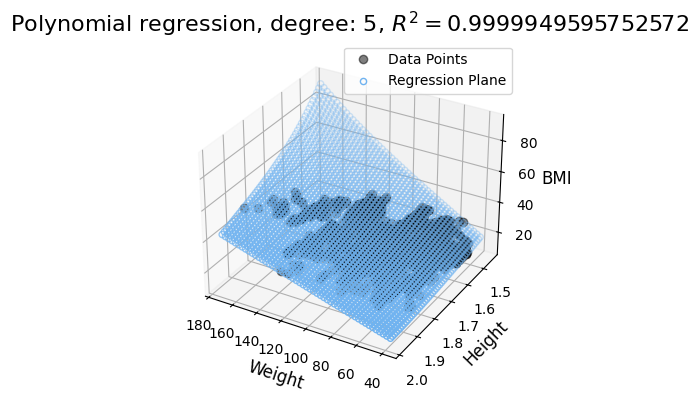

In [18]:
X = data[['Weight', 'Height']].values.reshape(-1, 2)
Y = data['BMI']
x = X[:, 0]
y = X[:, 1]
z = Y
x_p = np.linspace(x.min(), x.max(), 50) 
y_p = np.linspace(y.min(), y.max(), 50)
xx_p, yy_p = np.meshgrid(x_p, y_p)
model_viz = np.array([xx_p.flatten(), yy_p.flatten()]).T
reg_degree = 5
poly = PolynomialFeatures(degree=reg_degree, include_bias=False)
X_poly = poly.fit_transform(X)
reg = LinearRegression().fit(X_poly, Y)
y_pred_poly = reg.predict(X_poly)
predicted = reg.predict(poly.fit_transform(model_viz))
r_sq = reg.score(X_poly,Y)
print("\nBivariate polynomial regression R^2: ", reg.score(X_poly,Y))
print("Bivariate polynomial regression Intercept: ", reg.intercept_)
print("Bivariate polynomial regression Slope: ", reg.coef_)
print("Bivariate polynomial regression MAE: ", metrics.mean_absolute_error(Y, y_pred_poly))
print("Bivariate polynomial regression MSE: ", metrics.mean_squared_error(Y, y_pred_poly))
print("Bivariate polynomial regression RMSE: ", np.sqrt(metrics.mean_squared_error(Y, y_pred_poly)))
print("\n")

plt.style.use('default')

fig = plt.figure(figsize=(12, 4))

ax = fig.add_subplot(111, projection='3d')

ax.plot(x, y, z, color='k', linestyle='none', marker='o', alpha=0.5, label='Data Points')
ax.scatter(xx_p.flatten(), yy_p.flatten(), predicted, facecolor=(0, 0, 0, 0), s=20, edgecolor='#70b3f0', label='Regression Plane')

ax.set_xlabel('Weight', fontsize=12)
ax.set_ylabel('Height', fontsize=12)
ax.set_zlabel('BMI', fontsize=12)
ax.set_title(f'Polynomial regression, degree: {reg_degree}, $R^2 = {r_sq}$', fontsize=16)

ax.view_init(elev=30, azim=120)

plt.legend()
plt.tight_layout()
plt.show()

## 🔩 Ridge Regression

In [19]:
X = data['Weight'].values.reshape(-1, 1)
y = data['BMI']

rmodel = Ridge(alpha=0.05)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 0)
rmodel.fit(X_train,y_train)
y_pred = rmodel.predict(X_test)
mse = np.mean((y_pred-y_test)**2)
r_sq = rmodel.score(X_test,y_test)
print("Ridge R^2: ", r_sq)
print("Ridge MSE: ", mse)
print("\n")

Ridge R^2:  0.8831660061960038
Ridge MSE:  8.039063567334047




## 🧲 Lasso Regression

In [20]:
lmodel = Lasso(alpha=0.05)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 0)
lmodel.fit(X_train,y_train)
y_pred = lmodel.predict(X_test) 
print("Lasso R^2: ", lmodel.score(X_test, y_test))
print("\n")

Lasso R^2:  0.8831509252102974




## ⚖️ ElasticNet Regression

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 0)
Enet = ElasticNet(alpha=1.0, l1_ratio=0.5)
Enet = Enet.fit(X_train, y_train)
y_predict = Enet.predict(X_test)
print("ElasticNet R^2: ", Enet.score(X_test, y_test))
print()

ElasticNet R^2:  0.8829640723249975



## 🔐 Logistic Regression - Overweight Classification

Logistic 

Logistic intercept:  [-12.29337606]
Logistic coef:  [[0.48355041 0.0128507 ]]
Logistic R^2:  0.9589905362776026

 Confusion matrix 

[[156  26]
 [  0 452]]


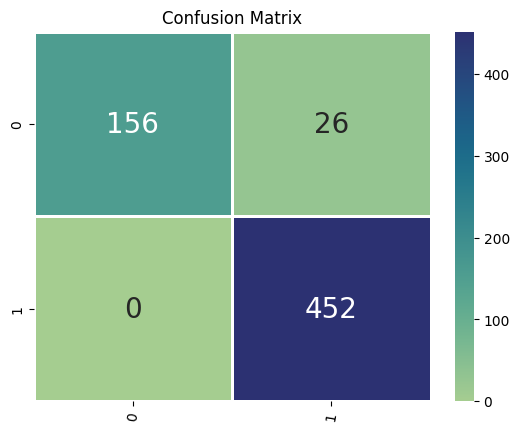


 Classification report 

              precision    recall  f1-score   support

           0       1.00      0.86      0.92       182
           1       0.95      1.00      0.97       452

    accuracy                           0.96       634
   macro avg       0.97      0.93      0.95       634
weighted avg       0.96      0.96      0.96       634


Matthews Correlation Coefficient (MCC): 0.90029


In [22]:
X = data[['BMI', 'Weight']].values.reshape(-1, 2)
y = data['overweight']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 0)
model = LogisticRegression(solver = "liblinear", random_state = 0).fit(X_train,y_train)
print("Logistic \n")
print("Logistic intercept: ", model.intercept_)
print("Logistic coef: ", model.coef_)
y_pred = model.predict(X_test)
print("Logistic R^2: ", model.score(X_test,y_test))
print("\n Confusion matrix \n")
print(confusion_matrix(y_test, y_pred))
plt.figure(dpi=100)
plt.title("Confusion Matrix")
sns.heatmap(confusion_matrix(y_test, y_pred), fmt="d", annot_kws={"size": 20}, annot=True, lw=1, cmap="crest", linecolor='white',)
plt.xticks(rotation=80)
plt.show()
print("\n Classification report \n")
print(classification_report(y_test, y_pred))

mcc = matthews_corrcoef(y_test, y_pred)
print("\nMatthews Correlation Coefficient (MCC): {:.5f}".format(mcc))